## 5. Building a model to predict Boston housing prices

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
type( boston )

sklearn.utils.Bunch

In [2]:
print( boston.DESCR )

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston.data.shape

(506, 13)

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.


In [5]:
# Converting it to a Dataframe 

import pandas as pd

data = pd.DataFrame(boston.data, columns = boston.feature_names)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
x = data  # Features

y = pd.DataFrame( boston.target ) # labels

In [7]:
y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
temp = data.copy()

temp['label'] = y

Distribution of Features and Label


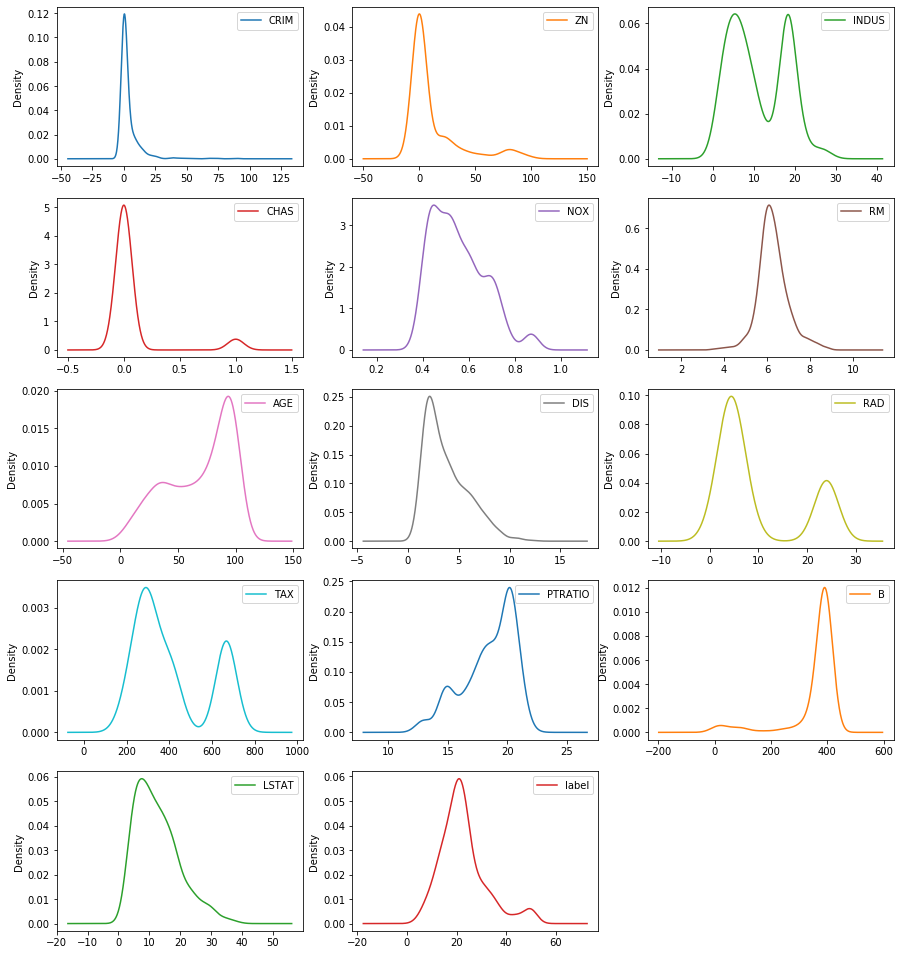

In [11]:
temp.plot(kind='density', subplots=True, figsize=(15,17), layout=(5,3), sharex=False, sharey=False)
print('Distribution of Features and Label')

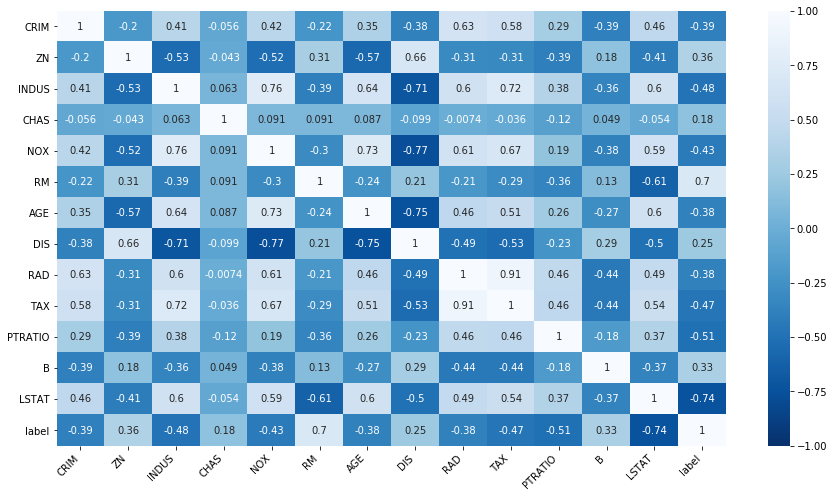

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure( figsize=(15,8))

ax=sns.heatmap(
    temp.corr(), 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    cmap='Blues_r',
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

In [13]:
print(data.CHAS.value_counts(),'\n')
print(data.RAD.value_counts())

0.0    471
1.0     35
Name: CHAS, dtype: int64 

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


CHAS is like an Binary Variable 1 or 0 and we need to ensure the splitting have some CHAS=1.0 data too

Otherwise the model will think only CHAS=0.0 is present

In [14]:
data['label'] = y
data.shape

(506, 14)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(data, data['CHAS']):
    xtr, xte = data.loc[train_index], data.loc[test_index]

print(xtr.shape)
print(xte.shape)

(354, 14)
(152, 14)


In [16]:
ytr = xtr['label']
xtr.drop(['label'], axis=1, inplace=True)

yte = xte['label']
xte.drop(['label'], axis=1, inplace=True)

print(ytr.shape)
print(yte.shape)

(354,)
(152,)


In [17]:
print( xtr.CHAS.value_counts() , '\n')
print( xte.CHAS.value_counts() )

0.0    330
1.0     24
Name: CHAS, dtype: int64 

0.0    141
1.0     11
Name: CHAS, dtype: int64


In [18]:
# We don't want to scale a Categorical variable here CHAS so we remove it and add it after scaling

trChas = xtr['CHAS']
teChas = xte['CHAS']

xte.drop(['CHAS'], axis=1, inplace=True)
xtr.drop(['CHAS'], axis=1, inplace=True)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit( xtr )
xtrScaled = scaler.transform( xtr )
xteScaled = scaler.transform( xte )

print( xtrScaled.shape )
print( xteScaled.shape )

(354, 12)
(152, 12)


In [20]:
print( xtrScaled[0] )
xtrScaled

[-0.43031222  1.03300622 -0.76454953 -1.06821718  0.44288387 -0.98367505
  0.88327391 -0.29807595 -0.49603496 -1.06848125  0.43295357 -0.4513261 ]


array([[-4.30312219e-01,  1.03300622e+00, -7.64549529e-01, ...,
        -1.06848125e+00,  4.32953567e-01, -4.51326100e-01],
       [-3.92726169e-01, -4.95830285e-01, -2.11976554e-01, ...,
        -9.17826578e-04,  4.38194432e-01, -3.85747321e-01],
       [-4.30905879e-01, -4.95830285e-01, -8.95078579e-01, ...,
         8.34566595e-01,  4.22899663e-01, -3.03425024e-01],
       ...,
       [ 4.09314635e-01, -4.95830285e-01,  9.77288117e-01, ...,
         8.34566595e-01, -3.77289395e+00,  1.47278318e+00],
       [-3.89568764e-01, -4.95830285e-01, -1.11904283e-01, ...,
         9.19137758e-02,  4.27498790e-01,  1.56905841e+00],
       [ 1.34262498e-01, -4.95830285e-01,  9.77288117e-01, ...,
         8.34566595e-01, -3.25522485e+00,  7.52811904e-01]])

In [21]:
xtr1 = np.append(xtrScaled, np.array(trChas).reshape(-1,1), axis=1)
xte1 = np.append(xteScaled, np.array(teChas).reshape(-1,1), axis=1)

print( xtr1.shape )
print( xte1.shape )

(354, 13)
(152, 13)


In [66]:
print(xtr1[0])
xtr1

[-0.43031222  1.03300622 -0.76454953 -1.06821718  0.44288387 -0.98367505
  0.88327391 -0.29807595 -0.49603496 -1.06848125  0.43295357 -0.4513261
  0.        ]


array([[-0.43031222,  1.03300622, -0.76454953, ...,  0.43295357,
        -0.4513261 ,  0.        ],
       [-0.39272617, -0.49583028, -0.21197655, ...,  0.43819443,
        -0.38574732,  0.        ],
       [-0.43090588, -0.49583028, -0.89507858, ...,  0.42289966,
        -0.30342502,  0.        ],
       ...,
       [ 0.40931463, -0.49583028,  0.97728812, ..., -3.77289395,
         1.47278318,  0.        ],
       [-0.38956876, -0.49583028, -0.11190428, ...,  0.42749879,
         1.56905841,  1.        ],
       [ 0.1342625 , -0.49583028,  0.97728812, ..., -3.25522485,
         0.7528119 ,  0.        ]])

### Why do we need Polynomial Regression ? <br>

<font size=3>
To overcome under-fitting, we need to increase the complexity of the model.<br>
To generate a higher order equation we can add powers of the original features as new features. 

The linear model, Y = a + bx

can be transformed to, Y = a + bx + cx²

This is still considered to be linear model as the coefficients/weights associated with the features are still linear.<br> x² is only a feature. However the curve that we are fitting is quadratic in nature.

    
To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn.<br> Next, we train the model using Linear Regression.

<b>PolynomialFeatures()</b>: Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.<br> For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].



In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

polynomial_features= PolynomialFeatures(degree=2)
polynomial_features.fit(xtr1)
xtrPoly = polynomial_features.transform(xtr1)
xtePoly = polynomial_features.transform(xte1)

In [24]:
print('Before PolynomialFeatures Transform :- ',xtr1.shape,'\n', xtr1[0][:20])

print('\n After PolynomialFeatures Transform :- ' ,xtrPoly.shape,'\n', xtrPoly[0][:20] )

Before PolynomialFeatures Transform :-  (354, 13) 
 [-0.43031222  1.03300622 -0.76454953 -1.06821718  0.44288387 -0.98367505
  0.88327391 -0.29807595 -0.49603496 -1.06848125  0.43295357 -0.4513261
  0.        ]

 After PolynomialFeatures Transform :-  (354, 105) 
 [ 1.         -0.43031222  1.03300622 -0.76454953 -1.06821718  0.44288387
 -0.98367505  0.88327391 -0.29807595 -0.49603496 -1.06848125  0.43295357
 -0.4513261   0.          0.18516861 -0.4445152   0.328995    0.45966691
 -0.19057834  0.4232874 ]


In [25]:
lr = LinearRegression()

lr.fit(xtrPoly, ytr)

ytrPred = lr.predict(xtrPoly)
ytePred = lr.predict(xtePoly)

print(' Train RMSE ', mean_squared_error(ytr, ytrPred, squared=False) )
print(' Test RMSE ', mean_squared_error(yte, ytePred, squared=False) )

 Train RMSE  2.107458397774523
 Test RMSE  4.172283817823583


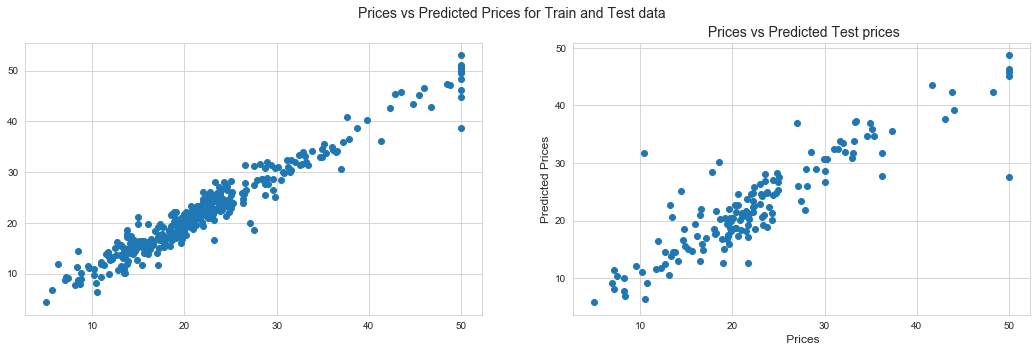

In [70]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (18,5))

fig.suptitle('Prices vs Predicted Prices for Train and Test data', size=14)

ax1.scatter( ytr, ytrPred )
ax1 = plt.xlabel(" Prices", size=12)
ax1 = plt.title(" Prices vs Predicted Train prices", size=14)

ax2.scatter( yte, ytePred )
ax2 = plt.xlabel(" Prices", size=12)
ax1 = plt.ylabel("Predicted Prices", size=12)
ax2 = plt.title(" Prices vs Predicted Test prices", size=14)

plt.grid(True)
plt.show()
plt.close()

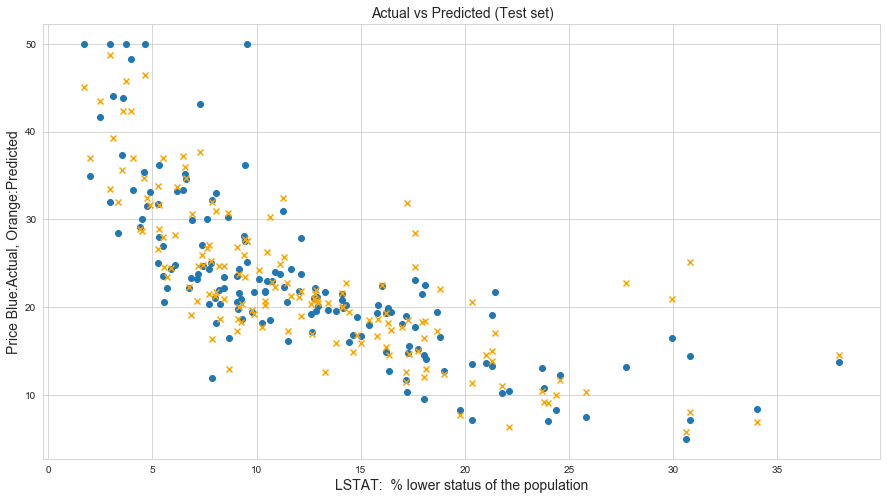

In [69]:
plt.figure( figsize=(15,8))

plt.scatter(xte['LSTAT'], yte)
plt.scatter(xte['LSTAT'], ytePred, color = "orange", marker='x')
plt.title("Actual vs Predicted (Test set)", size=14)
plt.ylabel("Price Blue:Actual, Orange:Predicted", size=14)
plt.xlabel("LSTAT:  % lower status of the population", size=14)
plt.grid(True)
plt.show()